In [1]:
# importing packages
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler, Normalizer
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, roc_curve, auc
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, LeaveOneOut, KFold

In [2]:
#Data
print(os.getcwd())

data_link = os.getcwd() + "\\TBI\\TBI_data_2.csv"
print(data_link)

F:\CTSN_TBI\Machine_learning
F:\CTSN_TBI\Machine_learning\TBI\TBI_data_2.csv


In [5]:
df_tbi = pd.read_csv(data_link, delimiter = ",")
df_tbi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 70 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   record_id                                     260 non-null    int64  
 1   age_at_record                                 259 non-null    float64
 2   sex                                           259 non-null    float64
 3   tbi_cli_reason                                259 non-null    float64
 4   tbi_cli_time_acci_hos                         240 non-null    float64
 5   tbi_cli_pulse                                 84 non-null     float64
 6   tbi_cli_temp                                  84 non-null     float64
 7   tbi_cli_blood_pressure                        83 non-null     float64
 8   tbi_cli_breathing_rate                        30 non-null     float64
 9   tbi_cli_glasgow                               260 non-null    int

## Data processing

### 4 class

In [7]:
selected_columns = ["tbi_cli_glasgow","tbi_ct_subdural_hematoma_position_value", "tbi_ct_subdural_hematoma_thick", "tbi_ct_epidural_hematoma_volume",
"ethanol", "tbi_ct_epidural_hematoma_value", "tbi_cli_pulse", "tbi_cli_temp", "age_at_record","tbi_ct_cerebral_contusion_volume", 
"tbi_ct_skull_fracture_characteristic", "tbi_cli_time_acci_hos", "tbi_ct_rotterdam", "tbi_cli_breathing_rate", "tbi_ct_subdural_hematoma_position_proprotion",
"tbi_ct_skull_risk", "tbi_ct_blood_hematoma_volume", "bach_cau_v2"]  # Replace with the names of the columns you want to select
# Select the columns
df_final = df_tbi[selected_columns]
df_final.head()


,tbi_cli_glasgow,tbi_ct_subdural_hematoma_position_value,tbi_ct_subdural_hematoma_thick,tbi_ct_epidural_hematoma_volume,ethanol,tbi_ct_epidural_hematoma_value,tbi_cli_pulse,tbi_cli_temp,age_at_record,tbi_ct_cerebral_contusion_volume,tbi_ct_skull_fracture_characteristic,tbi_cli_time_acci_hos,tbi_ct_rotterdam,tbi_cli_breathing_rate,tbi_ct_subdural_hematoma_position_proprotion,tbi_ct_skull_risk,tbi_ct_blood_hematoma_volume,bach_cau_v2
0,13,70.0,7.0,NaN,237.9,NaN,70.0,36.5,52.0,NaN,NaN,2.0,2.0,19.0,1.0,2.0,NaN,1.0
1,13,35.0,23.0,NaN,0.0,NaN,77.0,36.8,75.0,NaN,NaN,NaN,NaN,22.0,1.0,2.0,NaN,0.0
2,15,NaN,NaN,NaN,NaN,NaN,67.0,36.6,37.0,2.0,2.0,NaN,2.0,18.0,NaN,2.0,NaN,0.0
3,14,60.0,6.0,NaN,NaN,NaN,75.0,36.5,66.0,NaN,2.0,NaN,2.0,19.0,2.0,2.0,NaN,1.0
4,15,NaN,NaN,NaN,0.0,NaN,85.0,36.8,20.0,NaN,2.0,4.0,1.0,18.0,NaN,2.0,NaN,1.0


In [9]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   tbi_cli_glasgow                               260 non-null    int64  
 1   tbi_ct_subdural_hematoma_position_value       79 non-null     float64
 2   tbi_ct_subdural_hematoma_thick                93 non-null     float64
 3   tbi_ct_epidural_hematoma_volume               41 non-null     float64
 4   ethanol                                       109 non-null    float64
 5   tbi_ct_epidural_hematoma_value                40 non-null     float64
 6   tbi_cli_pulse                                 84 non-null     float64
 7   tbi_cli_temp                                  84 non-null     float64
 8   age_at_record                                 259 non-null    float64
 9   tbi_ct_cerebral_contusion_volume              78 non-null     flo

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_sc = df_final
df_new_tbi_target = df_tbi['d_kl_tl']
df_new_array = scaler.fit_transform(df_sc)
df_tbi_f = pd.DataFrame(df_new_array)
df_tbi_f

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.018599,0.543214,-0.153532,NaN,1.855910,NaN,-0.792786,-0.795610,0.402031,NaN,NaN,-0.194118,0.227946,0.328322,-0.625543,0.663325,NaN,0.521802
1,-0.018599,-3.308037,2.097267,NaN,-0.725666,NaN,-0.134370,0.442006,1.489632,NaN,NaN,NaN,NaN,2.066500,-0.625543,0.663325,NaN,-1.916436
2,0.672219,NaN,NaN,NaN,NaN,NaN,-1.074964,-0.383072,-0.307274,-0.505425,0.582223,NaN,0.227946,-0.251070,NaN,0.663325,NaN,-1.916436
3,0.326810,-0.557143,-0.294207,NaN,NaN,NaN,-0.322489,-0.795610,1.064049,NaN,0.582223,NaN,0.227946,0.328322,1.598611,0.663325,NaN,0.521802
4,0.672219,NaN,NaN,NaN,-0.725666,NaN,0.618104,0.442006,-1.111153,NaN,0.582223,-0.182502,-1.020803,-0.251070,NaN,0.663325,NaN,0.521802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.672219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.016579,NaN,0.582223,-0.194118,-1.020803,NaN,NaN,0.663325,NaN,-1.916436
256,-1.745643,NaN,NaN,NaN,1.059191,NaN,NaN,NaN,-0.165413,NaN,0.582223,-0.194118,0.227946,NaN,NaN,-1.507557,NaN,0.521802
257,-0.018599,-1.657501,-0.575557,NaN,NaN,NaN,NaN,NaN,1.915215,NaN,NaN,8.157150,-1.020803,NaN,-0.625543,0.663325,NaN,-1.916436
258,0.326810,0.543214,-0.997582,NaN,NaN,NaN,NaN,NaN,0.023735,NaN,0.582223,-0.176695,0.227946,NaN,1.598611,0.663325,NaN,0.521802


In [11]:
df_tbi_f.columns = df_final.columns.to_list()
df_tbi_f

,tbi_cli_glasgow,tbi_ct_subdural_hematoma_position_value,tbi_ct_subdural_hematoma_thick,tbi_ct_epidural_hematoma_volume,ethanol,tbi_ct_epidural_hematoma_value,tbi_cli_pulse,tbi_cli_temp,age_at_record,tbi_ct_cerebral_contusion_volume,tbi_ct_skull_fracture_characteristic,tbi_cli_time_acci_hos,tbi_ct_rotterdam,tbi_cli_breathing_rate,tbi_ct_subdural_hematoma_position_proprotion,tbi_ct_skull_risk,tbi_ct_blood_hematoma_volume,bach_cau_v2
0,-0.018599,0.543214,-0.153532,NaN,1.855910,NaN,-0.792786,-0.795610,0.402031,NaN,NaN,-0.194118,0.227946,0.328322,-0.625543,0.663325,NaN,0.521802
1,-0.018599,-3.308037,2.097267,NaN,-0.725666,NaN,-0.134370,0.442006,1.489632,NaN,NaN,NaN,NaN,2.066500,-0.625543,0.663325,NaN,-1.916436
2,0.672219,NaN,NaN,NaN,NaN,NaN,-1.074964,-0.383072,-0.307274,-0.505425,0.582223,NaN,0.227946,-0.251070,NaN,0.663325,NaN,-1.916436
3,0.326810,-0.557143,-0.294207,NaN,NaN,NaN,-0.322489,-0.795610,1.064049,NaN,0.582223,NaN,0.227946,0.328322,1.598611,0.663325,NaN,0.521802
4,0.672219,NaN,NaN,NaN,-0.725666,NaN,0.618104,0.442006,-1.111153,NaN,0.582223,-0.182502,-1.020803,-0.251070,NaN,0.663325,NaN,0.521802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.672219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.016579,NaN,0.582223,-0.194118,-1.020803,NaN,NaN,0.663325,NaN,-1.916436
256,-1.745643,NaN,NaN,NaN,1.059191,NaN,NaN,NaN,-0.165413,NaN,0.582223,-0.194118,0.227946,NaN,NaN,-1.507557,NaN,0.521802
257,-0.018599,-1.657501,-0.575557,NaN,NaN,NaN,NaN,NaN,1.915215,NaN,NaN,8.157150,-1.020803,NaN,-0.625543,0.663325,NaN,-1.916436
258,0.326810,0.543214,-0.997582,NaN,NaN,NaN,NaN,NaN,0.023735,NaN,0.582223,-0.176695,0.227946,NaN,1.598611,0.663325,NaN,0.521802


In [12]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
df_tbi_i = pd.DataFrame(knn_imputer.fit_transform(df_tbi_f), columns=df_tbi_f.columns)
df_tbi_i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   tbi_cli_glasgow                               260 non-null    float64
 1   tbi_ct_subdural_hematoma_position_value       260 non-null    float64
 2   tbi_ct_subdural_hematoma_thick                260 non-null    float64
 3   tbi_ct_epidural_hematoma_volume               260 non-null    float64
 4   ethanol                                       260 non-null    float64
 5   tbi_ct_epidural_hematoma_value                260 non-null    float64
 6   tbi_cli_pulse                                 260 non-null    float64
 7   tbi_cli_temp                                  260 non-null    float64
 8   age_at_record                                 260 non-null    float64
 9   tbi_ct_cerebral_contusion_volume              260 non-null    flo

In [13]:
X= df_tbi_i
y = df_new_tbi_target

In [14]:
print(y.value_counts())

2    142
3     80
1     20
4     18
Name: d_kl_tl, dtype: int64


In [15]:
print(y.value_counts())

2    142
3     80
1     20
4     18
Name: d_kl_tl, dtype: int64


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

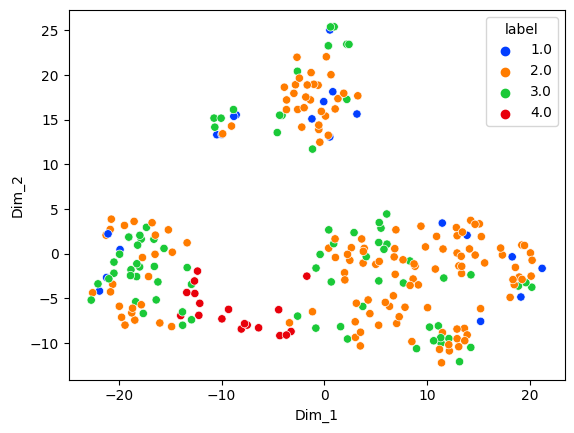

In [17]:
from sklearn.manifold import TSNE
model = TSNE(n_components = 2, perplexity=25, random_state = 0)
tsne_data = model.fit_transform(X)
tsne_data = np.vstack((tsne_data.T, y)).T
tsne_df = pd.DataFrame(data = tsne_data,
     columns =("Dim_1", "Dim_2", "label"))

sns.scatterplot(data=tsne_df, x='Dim_1', y='Dim_2',
               hue='label', palette="bright")
plt.show()


## Model

#### LOOCV

In [18]:
from sklearn.model_selection import cross_val_score, LeaveOneOut


# Assuming df_tbi4x, X, and y are already defined

# Define the models
svm_model = make_pipeline(SVC())
logreg_model = make_pipeline(LogisticRegression())
dt_model = make_pipeline(DecisionTreeClassifier())
knn_model = make_pipeline(KNeighborsClassifier(n_neighbors=5))
gnb = make_pipeline(GaussianNB())
rf = make_pipeline(RandomForestClassifier(n_estimators=100))

# Create a list of models
models = [svm_model, logreg_model, dt_model, knn_model, gnb,rf]

# Define LOOCV
loo = LeaveOneOut()

# Train and evaluate each model using LOOCV
for model in models:
    model_name = model.steps[-1][0]  # Extract the name of the classifier
    cv_scores = cross_val_score(model, X, y, cv=loo, scoring='accuracy')
    mean_accuracy = cv_scores.mean()
    print(f'Mean Accuracy ({model_name}): {mean_accuracy}')


Mean Accuracy (svc): 0.6576923076923077
Mean Accuracy (logisticregression): 0.6692307692307692
Mean Accuracy (decisiontreeclassifier): 0.6538461538461539
Mean Accuracy (kneighborsclassifier): 0.6346153846153846
Mean Accuracy (gaussiannb): 0.5807692307692308
Mean Accuracy (randomforestclassifier): 0.6692307692307692


In [19]:
from sklearn.metrics import confusion_matrix

models = [("SVM", svm_model), ("Logistic Regression", logreg_model), ("Decision Tree", dt_model), ("kNN", knn_model),("NB", gnb)]

# Define LOOCV
loo = LeaveOneOut()

# Train and evaluate each model using LOOCV
for model_name, model in models:
    y_true = []
    y_pred = []
    
    for train_index, test_index in loo.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_true.extend(y_test)
        y_pred.extend(model.predict(X_test))

    # Compute and print the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print(f"Confusion Matrix ({model_name}):\n", cm)
    print("\n")
    report = classification_report(y_true, y_pred)
    print(f"Classification Report ({model_name}):\n", report)
    print("\n")


Confusion Matrix (SVM):
 [[  0  16   4   0]
 [  2 126  13   1]
 [  0  42  33   5]
 [  0   0   6  12]]


Classification Report (SVM):
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        20
           2       0.68      0.89      0.77       142
           3       0.59      0.41      0.49        80
           4       0.67      0.67      0.67        18

    accuracy                           0.66       260
   macro avg       0.49      0.49      0.48       260
weighted avg       0.60      0.66      0.62       260



Confusion Matrix (Logistic Regression):
 [[  4  14   2   0]
 [  4 122  15   1]
 [  2  41  34   3]
 [  0   1   3  14]]


Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           1       0.40      0.20      0.27        20
           2       0.69      0.86      0.76       142
           3       0.63      0.42      0.51        80
           4       0.78      0.78      0.78   

In [21]:
cm_df = pd.DataFrame(cm,
                     index = ['Mild','Moderate','Severe', 'Very Serve'], 
                     columns = ['Mild','Moderate','Severe', 'Very Serve'])

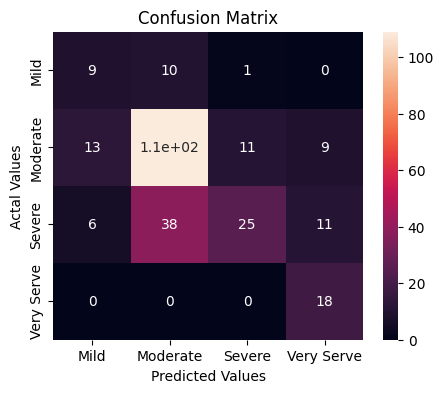

In [22]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [23]:
# # Evaluate the model's performance
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred, output_dict=True)
# precision_value = precision_score(y_test, y_pred, average='weighted')
# recall_value = report['weighted avg']['recall']
# f1_score_value = f1_score(y_test, y_pred, average='weighted')

# print('Precision:', precision_value)
# print('Recall :', recall_value)
# print('F1 Score:', f1_score_value)
# print("Accuracy:", accuracy)
# # Calculate and print precision, recall, and F1-score of the whole test set
# print('Classification report:\n',classification_report(y_test,y_pred))

#### k fold

In [20]:
from sklearn.model_selection import cross_val_score, KFold
# Create a list of models
models = [svm_model, logreg_model, dt_model, knn_model,gnb]

# Define KFold with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Train and evaluate each model using 10-fold cross-validation
for model in models:
    model_name = model.steps[-1][0]  # Extract the name of the classifier
    cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    mean_accuracy = cv_scores.mean()
    print(f'Mean Accuracy ({model_name}): {mean_accuracy}')
#     cm = confusion_matrix(y_true, y_pred)
#     print(f"Confusion Matrix ({model_name}):\n", cm)
#     print("\n")


Mean Accuracy (svc): 0.6576923076923077
Mean Accuracy (logisticregression): 0.6653846153846154
Mean Accuracy (decisiontreeclassifier): 0.6192307692307691
Mean Accuracy (kneighborsclassifier): 0.6346153846153846
Mean Accuracy (gaussiannb): 0.5730769230769232


In [21]:
# cm_df = pd.DataFrame(cm,
#                      index = ['Mild','Moderate','Severe', 'Very Serve'], 
#                      columns = ['Mild','Moderate','Severe', 'Very Serve'])

In [22]:
# #Plotting the confusion matrix
# plt.figure(figsize=(5,4))
# sns.heatmap(cm_df, annot=True)
# plt.title('Confusion Matrix')
# plt.ylabel('Actal Values')
# plt.xlabel('Predicted Values')
# plt.show()

### GridSearchCV

In [24]:
from sklearn.model_selection import GridSearchCV

# Assuming df_tbi4x, X, and y are already defined

# Define the models with their hyperparameter grids
svm_model = make_pipeline(SVC())
svm_param_grid = {'svc__kernel': ['linear', 'rbf']}

logreg_model = make_pipeline(LogisticRegression(max_iter=1000))
logreg_param_grid = {'logisticregression__C': [0.1, 1, 10]}


dt_model = make_pipeline(DecisionTreeClassifier())
dt_param_grid = {'decisiontreeclassifier__max_depth': [None, 10, 20], 'decisiontreeclassifier__min_samples_split': [2, 5, 10]}

knn_model = make_pipeline(KNeighborsClassifier())
knn_param_grid = {'kneighborsclassifier__n_neighbors': [3, 5, 7]}

gnb_model = make_pipeline( GaussianNB())


# Create a list of models with their corresponding parameter grids
models = [
    (svm_model, svm_param_grid),
    (logreg_model, logreg_param_grid),
    (dt_model, dt_param_grid),
    (knn_model, knn_param_grid),
    (gnb_model, {})  # GaussianNB does not have specific hyperparameters to tune
]

# Perform GridSearchCV for each model
for model, param_grid in models:
    model_name = model.steps[-1][0]  # Extract the name of the classifier
    
    grid_search = GridSearchCV(model, param_grid, cv=loo, scoring='accuracy')
    grid_search.fit(X, y)
    
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    print(f'Best Parameters ({model_name}): {best_params}')
    print(f'Best Accuracy ({model_name}): {best_score}')


Best Parameters (svc): {'svc__kernel': 'rbf'}
Best Accuracy (svc): 0.6653846153846154
Best Parameters (logisticregression): {'logisticregression__C': 1}
Best Accuracy (logisticregression): 0.6923076923076923
Best Parameters (decisiontreeclassifier): {'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__min_samples_split': 5}
Best Accuracy (decisiontreeclassifier): 0.6576923076923077
Best Parameters (kneighborsclassifier): {'kneighborsclassifier__n_neighbors': 3}
Best Accuracy (kneighborsclassifier): 0.6461538461538462
Best Parameters (gaussiannb): {}
Best Accuracy (gaussiannb): 0.6192307692307693


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Define the models
svm_model = make_pipeline(SVC())
logreg_model = make_pipeline(LogisticRegression())
dt_model = make_pipeline(DecisionTreeClassifier())
knn_model = make_pipeline(KNeighborsClassifier(n_neighbors=5))
gnb_model = make_pipeline(GaussianNB())

# Create a list of models
models = [("SVM", svm_model), ("Logistic Regression", logreg_model), 
          ("Decision Tree", dt_model), ("KNN", knn_model), ("Gaussian NB", gnb_model)]

# Perform train/test split with 80/20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate each model
for name, model in models:
    print(f"Evaluating {name} model:")
    
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    precision = precision_score(y_test, y_pred, average='macro',zero_division=1)
    
    # Print the evaluation metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print()  # Add empty line for better readability


Evaluating SVM model:
Accuracy: 0.6923
F1 Score: 0.6083
Recall: 0.5499
Precision: 0.8374

Evaluating Logistic Regression model:
Accuracy: 0.6731
F1 Score: 0.6041
Recall: 0.5715
Precision: 0.6634

Evaluating Decision Tree model:
Accuracy: 0.5385
F1 Score: 0.4907
Recall: 0.4780
Precision: 0.5401

Evaluating KNN model:
Accuracy: 0.6154
F1 Score: 0.5306
Recall: 0.5166
Precision: 0.6571

Evaluating Gaussian NB model:
Accuracy: 0.5962
F1 Score: 0.5811
Recall: 0.6716
Precision: 0.5697



In [30]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming svm_model is your trained SVM model
# # Make predictions on the test data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# y_pred = svm_model.predict(X_test)
# # Calculate evaluation metrics
# print(y_test)
# accuracy = accuracy_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred, average='macro')
# recall = recall_score(y_test, y_pred, average='macro')
# precision = precision_score(y_test, y_pred, average='macro',zero_division=1)
    
#     # Print the evaluation metrics
# print(f"Accuracy: {accuracy:.6f}")
# print(f"F1 Score: {f1:.4f}")
# print(f"Recall: {recall:.4f}")
# print(f"Precision: {precision:.4f}")
# print()  # Add empty line for better readability

# # Calculate the confusion matrix
# cm = confusion_matrix(y_test, y_pred)


# # Define class labels
# classes = ['Mild', 'Moderate', 'Severe', 'Very Severe']

# # Create a DataFrame from the confusion matrix
# cm_df = pd.DataFrame(cm, index=classes, columns=classes)

# # Plotting the confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='d')
# plt.title('Confusion Matrix - SVM Model')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.show()


### SMOTE

In [23]:
X= df_tbi_i
y = df_new_tbi_target

In [24]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to address class imbalance
smote = SMOTE(random_state= None)
X_resampled, y_resampled = smote.fit_resample(X, y)
print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_resampled.shape}''')


Shape of X before SMOTE: (260, 18)
Shape of X after SMOTE: (568, 18)


In [25]:
from sklearn.model_selection import cross_val_score, LeaveOneOut
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

# Assuming df_tbi4x, X, and y are already defined

# Define the models
svm_model = make_pipeline(SVC())
logreg_model = make_pipeline(LogisticRegression())
dt_model = make_pipeline(DecisionTreeClassifier())
knn_model = make_pipeline(KNeighborsClassifier(n_neighbors=5))
gnb = make_pipeline(GaussianNB())

# Create a list of models
models = [svm_model, logreg_model, dt_model, knn_model, gnb]

# Define LOOCV
loo = LeaveOneOut()

# Train and evaluate each model using LOOCV
for model in models:
    model_name = model.steps[-1][0]  # Extract the name of the classifier
    cv_scores = cross_val_score(model,X_resampled, y_resampled, cv=loo, scoring='accuracy')
    mean_accuracy = cv_scores.mean()
    print(f'Mean Accuracy ({model_name}): {mean_accuracy}')


Mean Accuracy (svc): 0.8080985915492958
Mean Accuracy (logisticregression): 0.8080985915492958
Mean Accuracy (decisiontreeclassifier): 0.829225352112676
Mean Accuracy (kneighborsclassifier): 0.801056338028169
Mean Accuracy (gaussiannb): 0.7235915492957746


In [26]:
# Define the models
svm_model = make_pipeline(SVC())
logreg_model = make_pipeline(LogisticRegression())
dt_model = make_pipeline(DecisionTreeClassifier())
knn_model = make_pipeline(KNeighborsClassifier(n_neighbors=5))
gnb = make_pipeline(GaussianNB())

# Create a list of models
models = [svm_model, logreg_model, dt_model, knn_model, gnb]

# Define LOOCV
kf = KFold(n_splits=10, shuffle=True, random_state=42)


for model in models:
    model_name = model.steps[-1][0]  # Extract the name of the classifier
    cv_scores = cross_val_score(model,X_resampled, y_resampled, cv=kf, scoring='accuracy')
    mean_accuracy = cv_scores.mean()
    print(f'Mean Accuracy ({model_name}): {mean_accuracy}')


Mean Accuracy (svc): 0.8080827067669173
Mean Accuracy (logisticregression): 0.8080200501253133
Mean Accuracy (decisiontreeclassifier): 0.8222431077694236
Mean Accuracy (kneighborsclassifier): 0.8012218045112782
Mean Accuracy (gaussiannb): 0.7166353383458647


In [27]:
from sklearn.model_selection import GridSearchCV

# Assuming df_tbi4x, X, and y are already defined

# Define the models with their hyperparameter grids
svm_model = make_pipeline(SVC())
svm_param_grid = {'svc__kernel': ['linear', 'rbf']}

logreg_model = make_pipeline(LogisticRegression(max_iter=1000))
logreg_param_grid = {'logisticregression__C': [0.1, 1, 10]}


dt_model = make_pipeline(DecisionTreeClassifier())
dt_param_grid = {'decisiontreeclassifier__max_depth': [None, 10, 20], 'decisiontreeclassifier__min_samples_split': [2, 5, 10]}

knn_model = make_pipeline(KNeighborsClassifier())
knn_param_grid = {'kneighborsclassifier__n_neighbors': [3, 5, 7]}

gnb_model = make_pipeline( GaussianNB())


# Create a list of models with their corresponding parameter grids
models = [
    (svm_model, svm_param_grid),
    (logreg_model, logreg_param_grid),
    (dt_model, dt_param_grid),
    (knn_model, knn_param_grid),
    (gnb_model, {})  # GaussianNB does not have specific hyperparameters to tune
]

# Perform GridSearchCV for each model
for model, param_grid in models:
    model_name = model.steps[-1][0]  # Extract the name of the classifier
    
    grid_search = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')
    grid_search.fit(X_resampled, y_resampled)
    
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    print(f'Best Parameters ({model_name}): {best_params}')
    print(f'Best Accuracy ({model_name}): {best_score}')


Best Parameters (svc): {'svc__kernel': 'rbf'}
Best Accuracy (svc): 0.794047619047619
Best Parameters (logisticregression): {'logisticregression__C': 10}
Best Accuracy (logisticregression): 0.8099937343358397
Best Parameters (decisiontreeclassifier): {'decisiontreeclassifier__max_depth': 20, 'decisiontreeclassifier__min_samples_split': 2}
Best Accuracy (decisiontreeclassifier): 0.818828320802005
Best Parameters (kneighborsclassifier): {'kneighborsclassifier__n_neighbors': 3}
Best Accuracy (kneighborsclassifier): 0.8046992481203008
Best Parameters (gaussiannb): {}
Best Accuracy (gaussiannb): 0.7148182957393484


## Evalution metrics

### K fold

In [28]:
# Define the models
svm_model = make_pipeline(SVC())
logreg_model = make_pipeline(LogisticRegression())
dt_model = make_pipeline(DecisionTreeClassifier())
knn_model = make_pipeline(KNeighborsClassifier(n_neighbors=5))
gnb = make_pipeline(GaussianNB())
rf = make_pipeline(RandomForestClassifier(n_estimators=100))

# Create a list of models
models = [svm_model, logreg_model, dt_model, knn_model, gnb,rf]

In [29]:
# Initialize lists to store results
accuracy_scores = []
f1_scores = []
sensitivity_scores = []
specificity_scores = []
conf_matrices = []

# Use leave-one-out cross-validation for evaluation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Iterate over models
for model in models:
    # Perform grid search with cross-validation
    y_true = []
    y_pred = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index],y.iloc[test_index]
        
        # Train model on training data
        model.fit(X_train, y_train)
        
        # Predict on test data
        y_pred.extend(model.predict(X_test))
        y_true.extend(y_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')  # Specify average='weighted' for multiclass
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Calculate sensitivity and specificity for each class
    sensitivity = []
    specificity = []
    for i in range(conf_matrix.shape[0]):
        tp = conf_matrix[i, i]
        fn = np.sum(conf_matrix[i, :]) - tp
        fp = np.sum(conf_matrix[:, i]) - tp
        tn = np.sum(conf_matrix) - tp - fn - fp
        
        sensitivity.append(tp / (tp + fn))
        specificity.append(tn / (tn + fp))
    
    # Append mean sensitivity and specificity to lists
    sensitivity_scores.append(np.mean(sensitivity))
    specificity_scores.append(np.mean(specificity))
    
    # Append results to lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

# Print results
for i, model in enumerate(models):
    print(f"Model {i+1}: {list(model.named_steps.keys())} - Accuracy: {accuracy_scores[i]}, F1 Score: {f1_scores[i]}")
    print(f"Mean Sensitivity (Recall): {sensitivity_scores[i]}, Mean Specificity: {specificity_scores[i]}")


Model 1: ['svc'] - Accuracy: 0.6576923076923077, F1 Score: 0.6158579545550702
Mean Sensitivity (Recall): 0.4566021126760563, Mean Specificity: 0.8372750521392662
Model 2: ['logisticregression'] - Accuracy: 0.6653846153846154, F1 Score: 0.6472283272283272
Mean Sensitivity (Recall): 0.5556875978090767, Mean Specificity: 0.8432665444895799
Model 3: ['decisiontreeclassifier'] - Accuracy: 0.6038461538461538, F1 Score: 0.6088271043207519
Mean Sensitivity (Recall): 0.5718407668231612, Mean Specificity: 0.8372342940187701
Model 4: ['kneighborsclassifier'] - Accuracy: 0.6346153846153846, F1 Score: 0.6146697413416867
Mean Sensitivity (Recall): 0.45536482785602506, Mean Specificity: 0.8335357134519307
Model 5: ['gaussiannb'] - Accuracy: 0.573076923076923, F1 Score: 0.5582668793195109
Mean Sensitivity (Recall): 0.5952024647887324, Mean Specificity: 0.8236307119733545
Model 6: ['randomforestclassifier'] - Accuracy: 0.6923076923076923, F1 Score: 0.6708195328296925
Mean Sensitivity (Recall): 0.550601

In [30]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to address class imbalance
smote = SMOTE(random_state= None)
X_resampled, y_resampled = smote.fit_resample(X, y)
print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_resampled.shape}''')


Shape of X before SMOTE: (260, 18)
Shape of X after SMOTE: (568, 18)


In [31]:
# Define LOOCV
from sklearn.model_selection import cross_val_score, LeaveOneOut
kf = KFold(n_splits=10, shuffle=True, random_state=42)


# Train and evaluate each model using LOOCV
for model in models:
    model_name = model.steps[-1][0]  # Extract the name of the classifier
    cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=kf, scoring='accuracy')
    mean_accuracy = cv_scores.mean()
    print(f'Mean Accuracy ({model_name}): {mean_accuracy}')


Mean Accuracy (svc): 0.8011904761904761
Mean Accuracy (logisticregression): 0.7975563909774436
Mean Accuracy (decisiontreeclassifier): 0.7871553884711779
Mean Accuracy (kneighborsclassifier): 0.7976190476190476
Mean Accuracy (gaussiannb): 0.7234962406015037
Mean Accuracy (randomforestclassifier): 0.868076441102757


In [32]:
# Initialize lists to store results
accuracy_scores = []
f1_scores = []
sensitivity_scores = []
specificity_scores = []
conf_matrices = []

# Use leave-one-out cross-validation for evaluation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Iterate over models
for model in models:
    # Perform grid search with cross-validation
    y_true = []
    y_pred = []
    for train_index, test_index in kf.split(X_resampled):
        X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
        y_train, y_test = y_resampled.iloc[train_index],y_resampled.iloc[test_index]
        
        # Train model on training data
        model.fit(X_train, y_train)
        
        # Predict on test data
        y_pred.extend(model.predict(X_test))
        y_true.extend(y_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')  # Specify average='weighted' for multiclass
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Calculate sensitivity and specificity for each class
    sensitivity = []
    specificity = []
    for i in range(conf_matrix.shape[0]):
        tp = conf_matrix[i, i]
        fn = np.sum(conf_matrix[i, :]) - tp
        fp = np.sum(conf_matrix[:, i]) - tp
        tn = np.sum(conf_matrix) - tp - fn - fp
        
        sensitivity.append(tp / (tp + fn))
        specificity.append(tn / (tn + fp))
    
    # Append mean sensitivity and specificity to lists
    sensitivity_scores.append(np.mean(sensitivity))
    specificity_scores.append(np.mean(specificity))
    
    # Append results to lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

# Print results
for i, model in enumerate(models):
    print(f"Model {i+1}: {list(model.named_steps.keys())} - Accuracy: {accuracy_scores[i]}, F1 Score: {f1_scores[i]}")
    print(f"Mean Sensitivity (Recall): {sensitivity_scores[i]}, Mean Specificity: {specificity_scores[i]}")


Model 1: ['svc'] - Accuracy: 0.801056338028169, F1 Score: 0.7876232625453391
Mean Sensitivity (Recall): 0.801056338028169, Mean Specificity: 0.9336854460093897
Model 2: ['logisticregression'] - Accuracy: 0.7975352112676056, F1 Score: 0.7862480550787848
Mean Sensitivity (Recall): 0.7975352112676056, Mean Specificity: 0.9325117370892018
Model 3: ['decisiontreeclassifier'] - Accuracy: 0.801056338028169, F1 Score: 0.7992973200518356
Mean Sensitivity (Recall): 0.801056338028169, Mean Specificity: 0.9336854460093896
Model 4: ['kneighborsclassifier'] - Accuracy: 0.7975352112676056, F1 Score: 0.7866033516677557
Mean Sensitivity (Recall): 0.7975352112676056, Mean Specificity: 0.9325117370892018
Model 5: ['gaussiannb'] - Accuracy: 0.7235915492957746, F1 Score: 0.7050331206665473
Mean Sensitivity (Recall): 0.7235915492957746, Mean Specificity: 0.9078638497652581
Model 6: ['randomforestclassifier'] - Accuracy: 0.8767605633802817, F1 Score: 0.8740369260319424
Mean Sensitivity (Recall): 0.8767605633

In [33]:
# Initialize lists to store results
accuracy_scores = []
f1_scores = []
sensitivity_scores = []
specificity_scores = []
conf_matrices = []

# Use leave-one-out cross-validation for evaluation
loo = LeaveOneOut()

# Iterate over models
for model in models:
    # Perform grid search with cross-validation
    y_true = []
    y_pred = []
    for train_index, test_index in kf.split(X_resampled):
        X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
        y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]
        
        # Train model on training data
        model.fit(X_train, y_train)
        
        # Predict on test data
        y_pred.extend(model.predict(X_test))
        y_true.extend(y_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')  # Specify average='weighted' for multiclass
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Calculate sensitivity and specificity for each class
    sensitivity = []
    specificity = []
    for i in range(conf_matrix.shape[0]):
        tp = conf_matrix[i, i]
        fn = np.sum(conf_matrix[i, :]) - tp
        fp = np.sum(conf_matrix[:, i]) - tp
        tn = np.sum(conf_matrix) - tp - fn - fp
        
        sensitivity.append(tp / (tp + fn))
        specificity.append(tn / (tn + fp))
    
    # Append mean sensitivity and specificity to lists
    sensitivity_scores.append(np.mean(sensitivity))
    specificity_scores.append(np.mean(specificity))
    
    # Append results to lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

# Print results
for i, model in enumerate(models):
    print(f"Model {i+1}: {list(model.named_steps.keys())} - Accuracy: {accuracy_scores[i]}, F1 Score: {f1_scores[i]}")
    print(f"Mean Sensitivity (Recall): {sensitivity_scores[i]}, Mean Specificity: {specificity_scores[i]}")


Model 1: ['svc'] - Accuracy: 0.801056338028169, F1 Score: 0.7876232625453391
Mean Sensitivity (Recall): 0.801056338028169, Mean Specificity: 0.9336854460093897
Model 2: ['logisticregression'] - Accuracy: 0.7975352112676056, F1 Score: 0.7862480550787848
Mean Sensitivity (Recall): 0.7975352112676056, Mean Specificity: 0.9325117370892018
Model 3: ['decisiontreeclassifier'] - Accuracy: 0.8045774647887324, F1 Score: 0.8035740641736375
Mean Sensitivity (Recall): 0.8045774647887325, Mean Specificity: 0.9348591549295775
Model 4: ['kneighborsclassifier'] - Accuracy: 0.7975352112676056, F1 Score: 0.7866033516677557
Mean Sensitivity (Recall): 0.7975352112676056, Mean Specificity: 0.9325117370892018
Model 5: ['gaussiannb'] - Accuracy: 0.7235915492957746, F1 Score: 0.7050331206665473
Mean Sensitivity (Recall): 0.7235915492957746, Mean Specificity: 0.9078638497652581
Model 6: ['randomforestclassifier'] - Accuracy: 0.8732394366197183, F1 Score: 0.870245058790665
Mean Sensitivity (Recall): 0.873239436

In [34]:
# Import necessary libraries
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Initialize lists to store results
accuracy_scores = []
f1_scores = []
sensitivity_scores = []
specificity_scores = []

# Use leave-one-out cross-validation for evaluation
loo = LeaveOneOut()

# Iterate over models
for model in models:
    # Perform grid search with cross-validation
    y_true = []
    y_pred = []
    for train_index, test_index in loo.split(X_resampled):
        X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
        y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]
        
        # Train model on training data
        model.fit(X_train, y_train)
        
        # Predict on test data
        y_pred.extend(model.predict(X_test))
        y_true.extend(y_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')  # Specify average='weighted' for multiclass
    conf_matrix = confusion_matrix(y_true, y_pred)
    
    # Calculate sensitivity and specificity for each class
    sensitivity = []
    specificity = []
    for i in range(conf_matrix.shape[0]):
        tp = conf_matrix[i, i]
        fn = np.sum(conf_matrix[i, :]) - tp
        fp = np.sum(conf_matrix[:, i]) - tp
        tn = np.sum(conf_matrix) - tp - fn - fp
        
        sensitivity.append(tp / (tp + fn))
        specificity.append(tn / (tn + fp))
    
    # Append mean sensitivity and specificity to lists
    sensitivity_scores.append(np.mean(sensitivity))
    specificity_scores.append(np.mean(specificity))
    
    # Append results to lists
    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

# Print results
for i, model in enumerate(models):
    print(f"Model {i+1}: {list(model.named_steps.keys())} - Accuracy: {accuracy_scores[i]}, F1 Score: {f1_scores[i]}")
    print(f"Mean Sensitivity (Recall): {sensitivity_scores[i]}, Mean Specificity: {specificity_scores[i]}")


Model 1: ['svc'] - Accuracy: 0.801056338028169, F1 Score: 0.7884896609687897
Mean Sensitivity (Recall): 0.801056338028169, Mean Specificity: 0.9336854460093897
Model 2: ['logisticregression'] - Accuracy: 0.7992957746478874, F1 Score: 0.789653869776364
Mean Sensitivity (Recall): 0.7992957746478873, Mean Specificity: 0.9330985915492958
Model 3: ['decisiontreeclassifier'] - Accuracy: 0.8169014084507042, F1 Score: 0.8156296745764153
Mean Sensitivity (Recall): 0.8169014084507042, Mean Specificity: 0.9389671361502347
Model 4: ['kneighborsclassifier'] - Accuracy: 0.795774647887324, F1 Score: 0.7844937909282461
Mean Sensitivity (Recall): 0.795774647887324, Mean Specificity: 0.931924882629108
Model 5: ['gaussiannb'] - Accuracy: 0.727112676056338, F1 Score: 0.7089592979816003
Mean Sensitivity (Recall): 0.727112676056338, Mean Specificity: 0.909037558685446
Model 6: ['randomforestclassifier'] - Accuracy: 0.8732394366197183, F1 Score: 0.8704163274078971
Mean Sensitivity (Recall): 0.873239436619718

### Draw decision tree

In [35]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to address class imbalance
smote = SMOTE(random_state= None)
X_resampled, y_resampled = smote.fit_resample(X, y)
print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_resampled.shape}''')


Shape of X before SMOTE: (260, 18)
Shape of X after SMOTE: (568, 18)


In [14]:
# Fit the classifier with default hyper-parameters
clf = DecisionTreeClassifier(random_state=42)
clf_model = clf.fit(X_resampled, y_resampled)

In [15]:
from sklearn import tree
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_0 <= -1.69
|   |--- feature_1 <= 1.02
|   |   |--- feature_8 <= 3.21
|   |   |   |--- feature_10 <= -0.17
|   |   |   |   |--- feature_7 <= -0.93
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- feature_7 >  -0.93
|   |   |   |   |   |--- class: 4
|   |   |   |--- feature_10 >  -0.17
|   |   |   |   |--- class: 3
|   |   |--- feature_8 >  3.21
|   |   |   |--- class: 2
|   |--- feature_1 >  1.02
|   |   |--- feature_7 <= -0.69
|   |   |   |--- class: 2
|   |   |--- feature_7 >  -0.69
|   |   |   |--- class: 3
|--- feature_0 >  -1.69
|   |--- feature_5 <= -0.49
|   |   |--- feature_0 <= 0.34
|   |   |   |--- feature_10 <= -0.11
|   |   |   |   |--- feature_3 <= 0.68
|   |   |   |   |   |--- feature_10 <= -0.19
|   |   |   |   |   |   |--- feature_6 <= 0.33
|   |   |   |   |   |   |   |--- feature_17 <= -0.08
|   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |--- feature_17 >  -0.08
|   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |

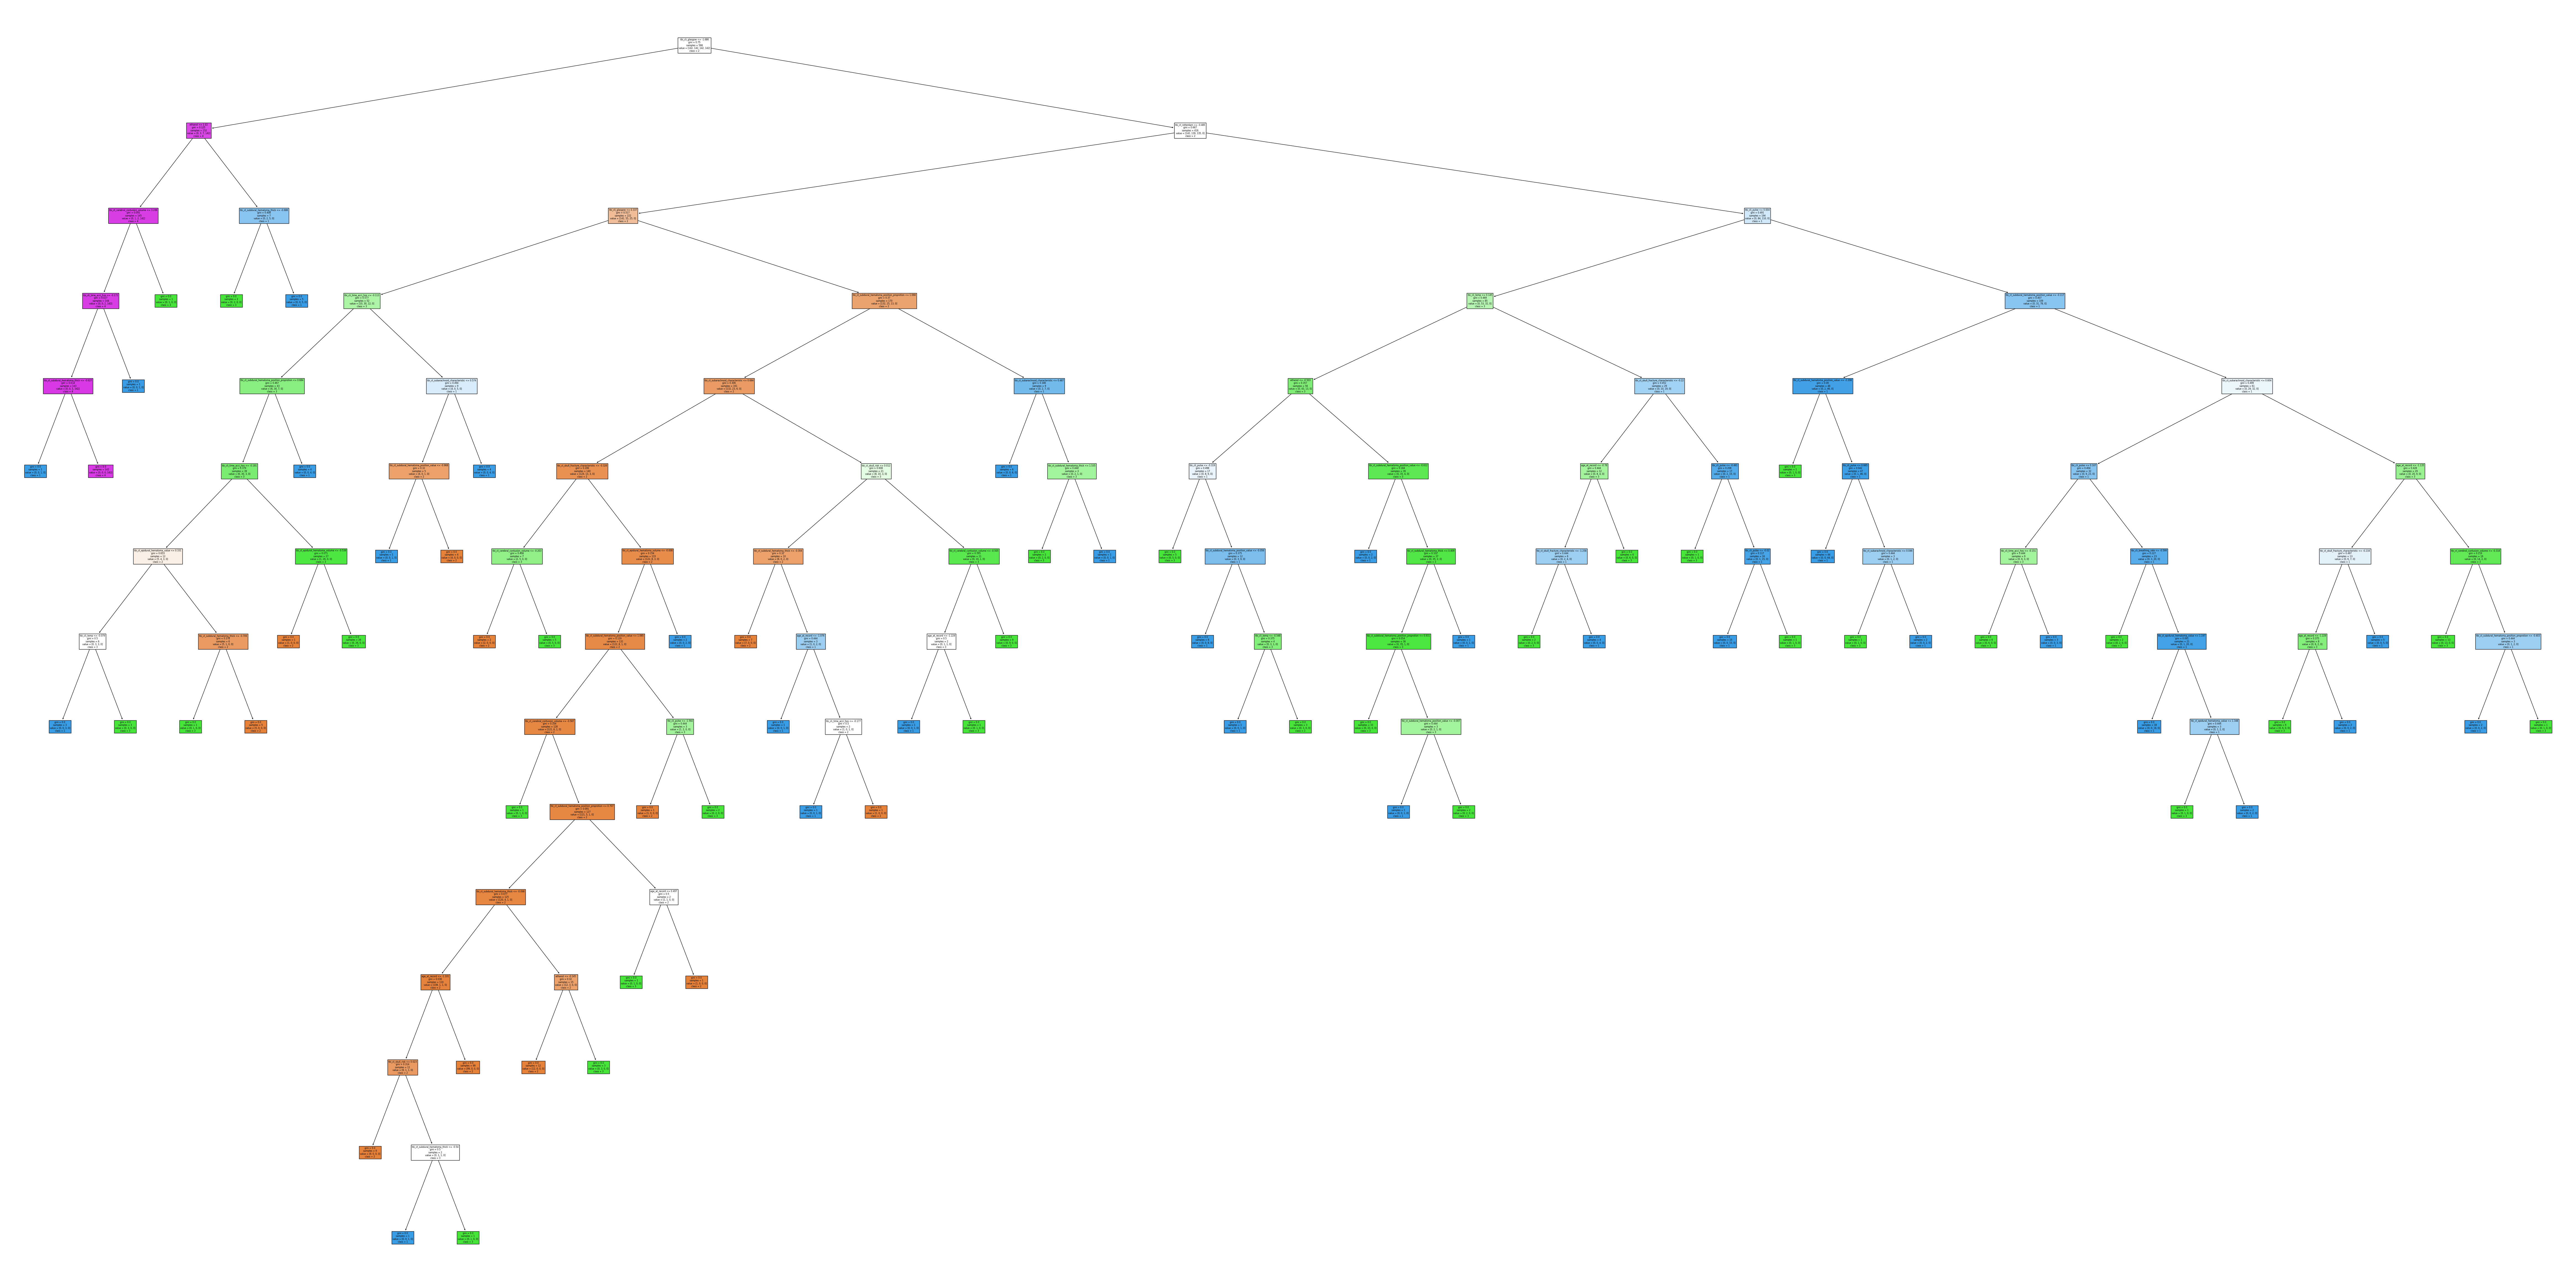

In [18]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming df_tbi_i.feature_names and df_new_tbi_target.target_names contain the feature names and target names respectively

# Convert target names to string if they're not already strings
target_names_str = [str(name) for name in df_new_tbi_target.unique()]

# Create a figure and plot the decision tree
fig = plt.figure(figsize=(120,60))
_ = plot_tree(clf, 
              feature_names=df_tbi_i.columns.tolist(),  # Convert feature names to list if not already
              class_names=target_names_str,  # Pass the target names as strings
              filled=True)
plt.show()


In [19]:
fig.savefig("decistion_tree.png")

## Draw random forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate Random Forest Classifier with default hyperparameters and random state set to 42
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier to your data
rf_model = rf_classifier.fit(X, y)


In [21]:
# # You can also print the textual representation of one of the decision trees in the forest if needed
# # For example, to print the first tree:
# text_representation = tree.export_text(rf_classifier.estimators_[0])
# print(text_representation)

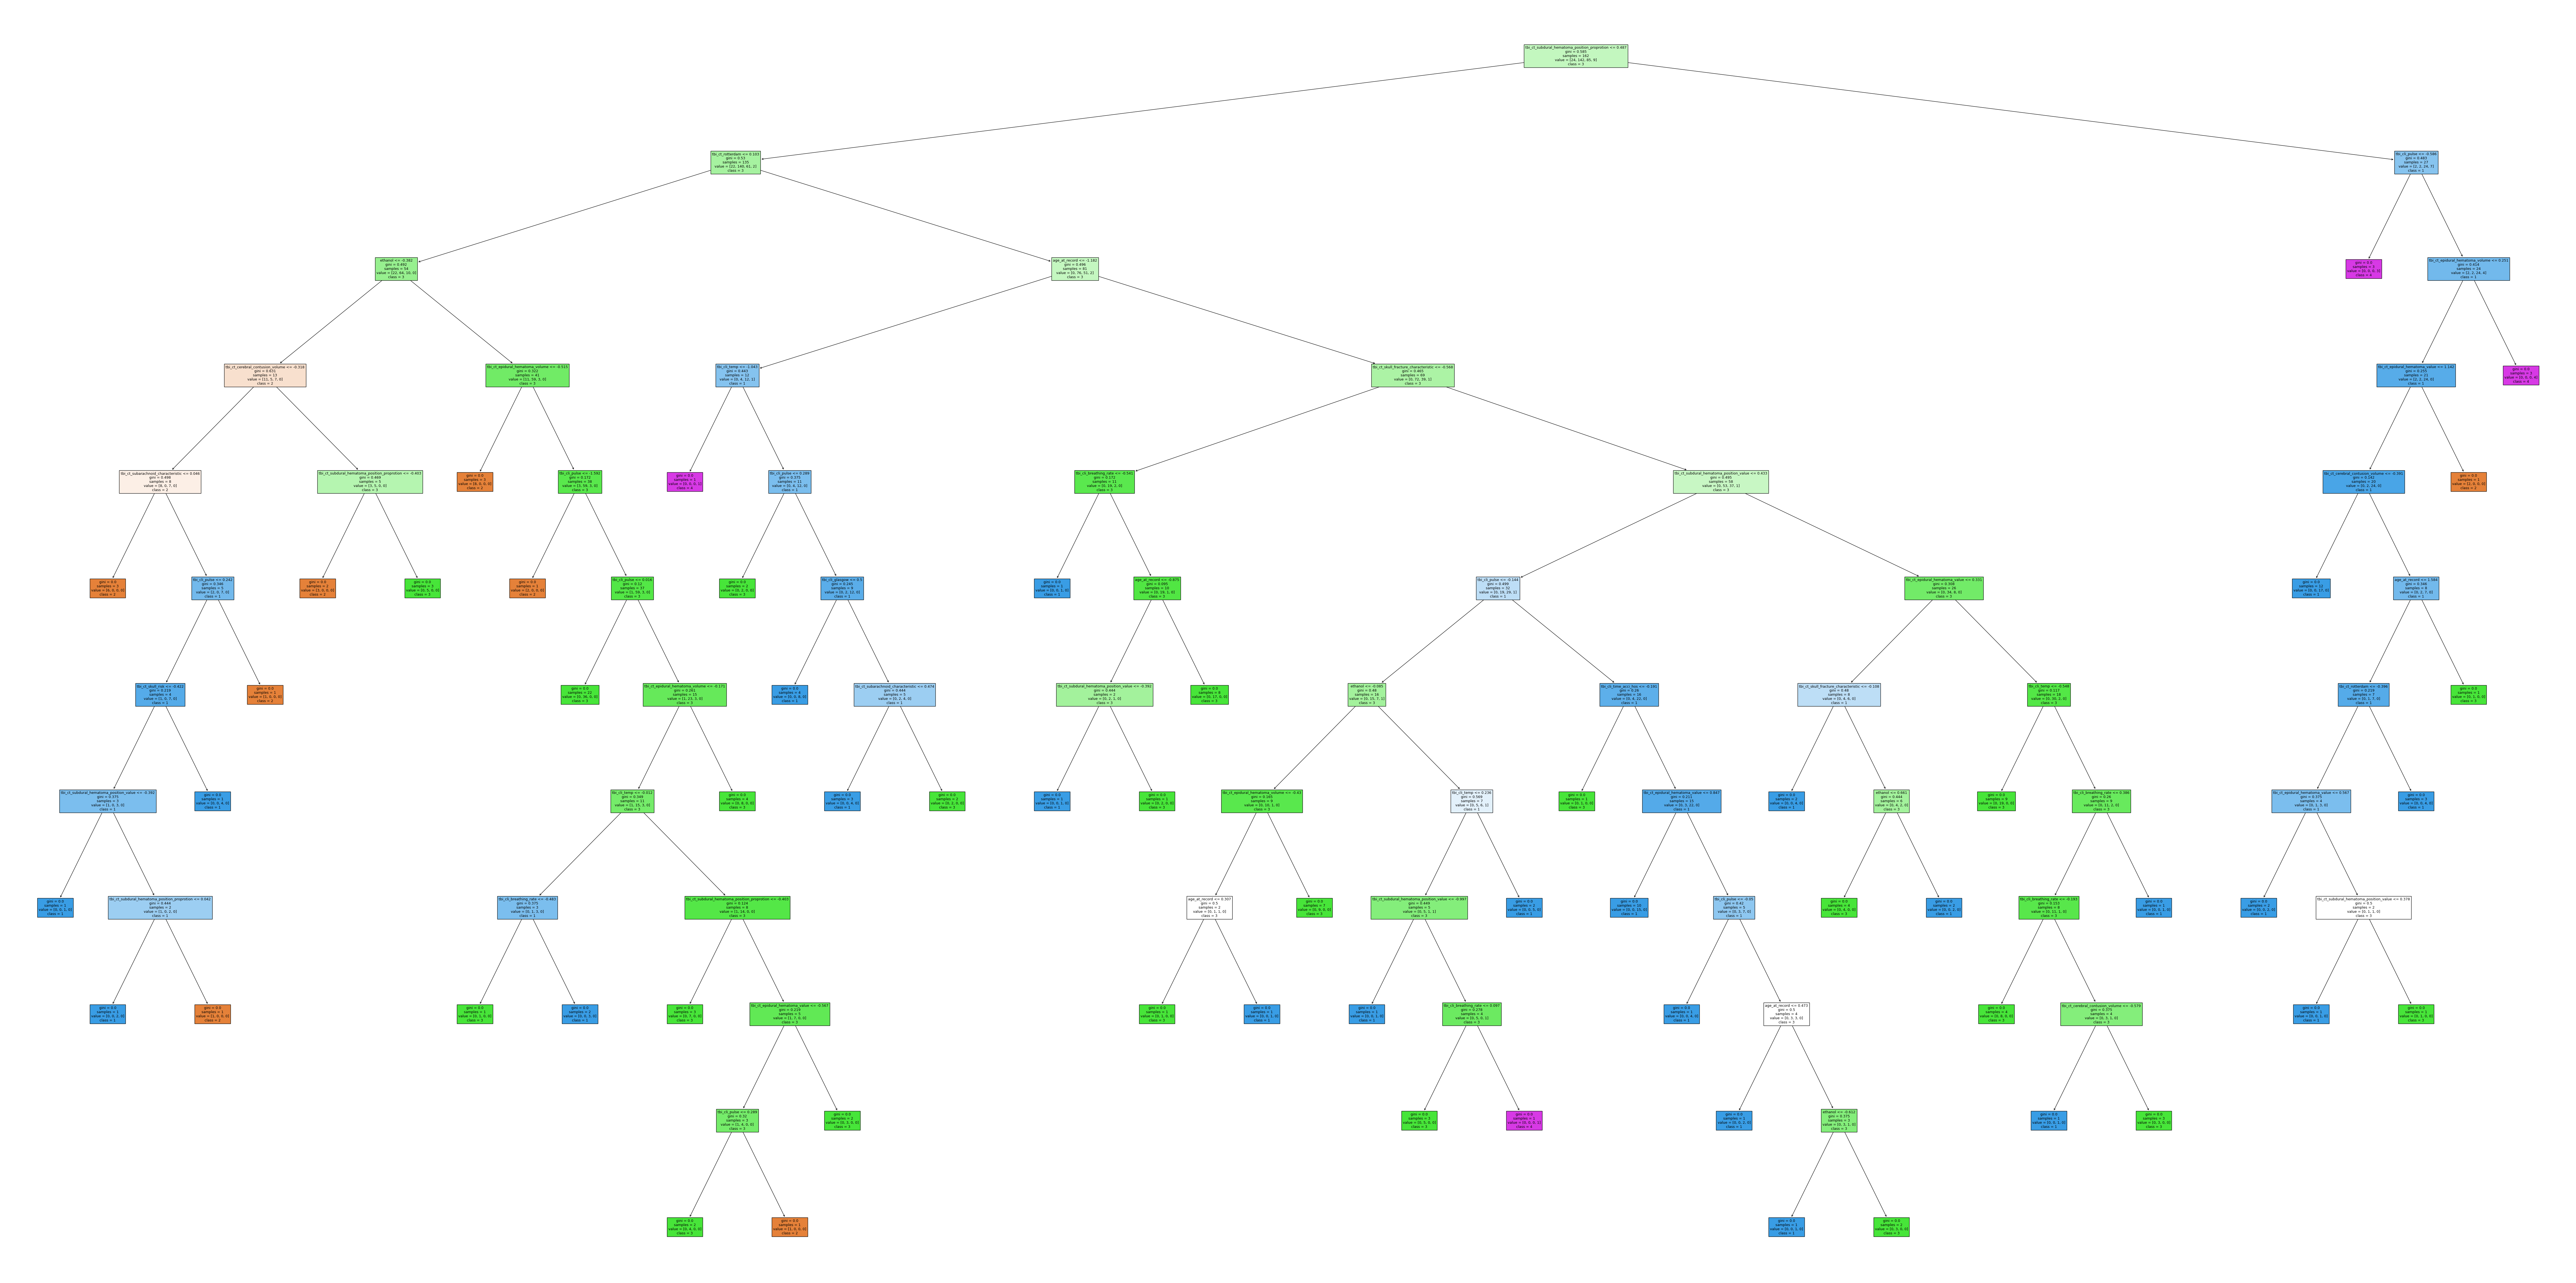

In [22]:
# Access the first decision tree from the forest
first_tree = rf_classifier.estimators_[0]

# Convert target names to string if they're not already strings
target_names_str = [str(name) for name in df_new_tbi_target.unique()]

# Create a figure and plot the decision tree
fig = plt.figure(figsize=(120, 60))  # Adjust the figure size as needed
_ = plot_tree(first_tree, 
              feature_names=df_tbi_i.columns.tolist(),  # Convert feature names to list if not already
              class_names=target_names_str,  # Pass the target names as strings
              filled=True)
plt.show()

In [23]:
fig.savefig("random_forest.png")
